In [48]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns

import sklearn
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import Lasso,Ridge
from sklearn.metrics import mean_squared_error

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data/conversion_data.csv')

In [3]:
df.columns

Index(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted'],
      dtype='object')

In [4]:
df

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0


In [5]:
# root_folder_path=os.getcwd()
# data_path=os.path.join(root_folder_path, "data")

In [6]:
# root_folder_path

In [7]:
# df_users=pd.read_csv(os.path.join(data_path,"conversion_data.csv"))

In [8]:
print(df.isnull().any().any())

False


# Let is see graphs that influence for converstion:

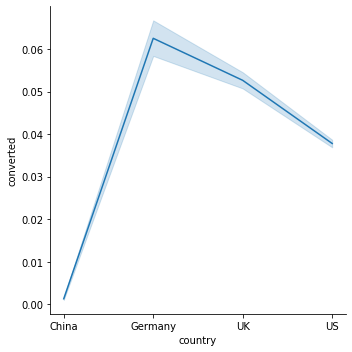

In [9]:
sns.relplot(x='country', y='converted', data= df, kind="line")

country doesn's seem influence for converstion

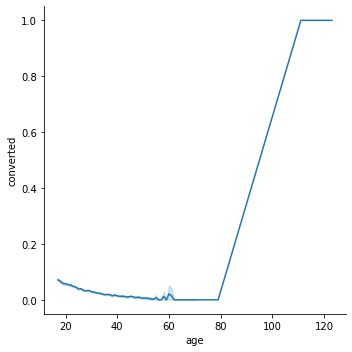

In [10]:
sns.relplot(x='age', y='converted', data= df, kind="line")

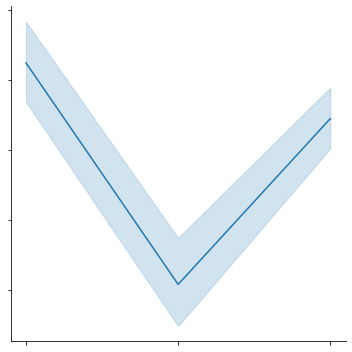

In [430]:
sns.relplot(x='source', y='converted', data= df, kind="line")

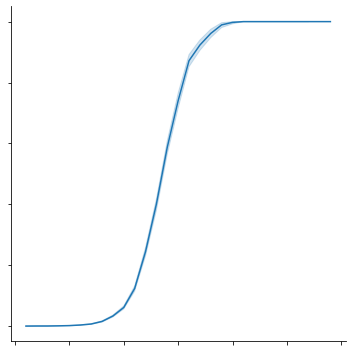

In [431]:
sns.relplot(x='total_pages_visited', y='converted', data= df, kind="line")

KeyboardInterrupt: 

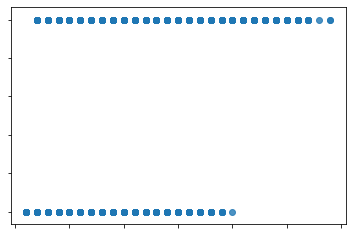

In [432]:
fig = sns.regplot(x="total_pages_visited", y="converted", data=df)
plt.title("Total pages visited vs Conversion")
plt.show()

In [ ]:
#Let's see new users converted rate:

data_user = {'New user': df['new_user'],
           'Converted': df['converted']
          }
df_user = pd.DataFrame(data_user,columns=['New user', 'Converted'])
mask= df_user['New user']==1
df_user.loc[mask,'Converted'].value_counts()
# df_user.shape
# corr_user = df_user.corr()
# sns.heatmap(corr_user, annot=True)
# plt.show()

# Total page visit seems have an influence for converstion

**Understanding the relation between different factors responsible for conversion.**

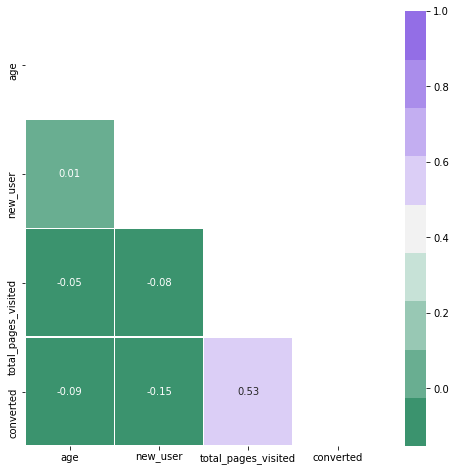

In [11]:
df_plot=df
df_plot.rename(columns={'new_user':'new user',
                       'total_pages_visited':'total pages visited'
                       }, inplace=False)

corr = df_plot.corr()
fig, ax = plt.subplots(figsize=(8, 8))
colormap = sns.diverging_palette(150, 275, s=80, l=55, n=9)
dropSelf = np.zeros_like(corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
colormap = sns.diverging_palette(150, 275, s=80, l=55, n=9)
sns.heatmap(corr, cmap=colormap, linewidths=.5, annot=True, fmt=".2f", mask=dropSelf)
plt.show()

In [ ]:
#Plotting the heatmap of correlation between attributes
# plt.figure(figsize=(7,7))
# sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [433]:
df

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0
...,...,...,...,...,...,...
316195,US,26,1,Ads,9,0
316196,US,27,1,Direct,6,0
316197,China,25,0,Ads,4,0
316198,US,22,0,Seo,4,0


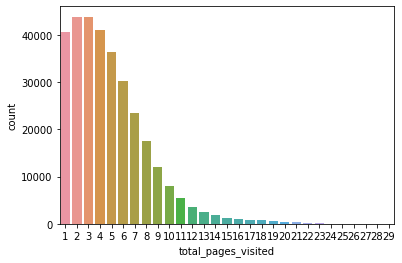

In [49]:
sns.countplot(x='total_pages_visited', data=df)

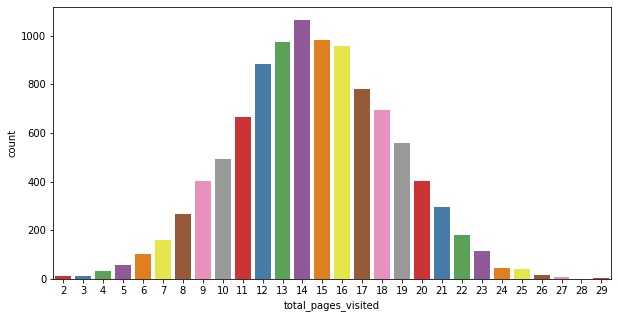

In [50]:
#Total pages visited when converted rate is 1.
plt.figure(figsize=(10,5))
chart = sns.countplot(
    data=df[df['converted'] == 1],
    x='total_pages_visited',
    palette='Set1')

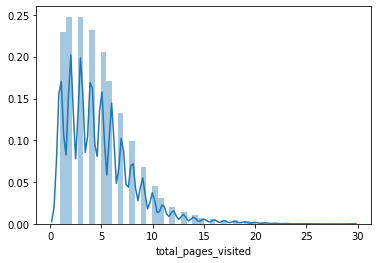

In [51]:
sns.distplot(df['total_pages_visited'])

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]),
 <a list of 9 Text xticklabel objects>)

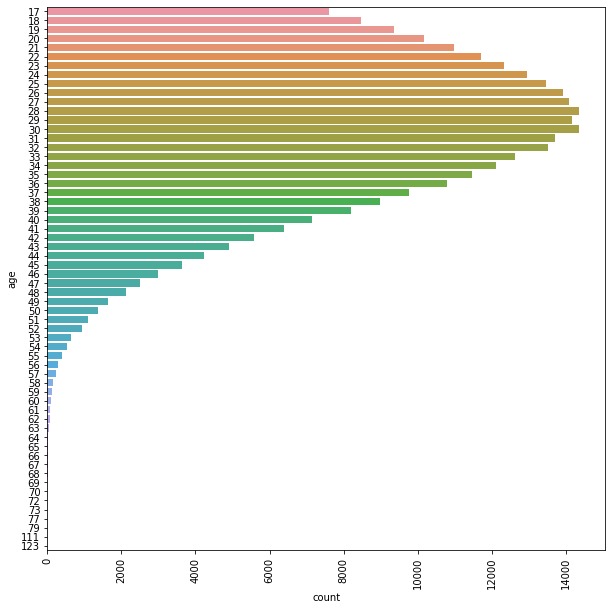

In [52]:
plt.figure(figsize=(10,10))
sns.countplot(y='age', data=df)
plt.xticks(rotation=90)

Lets split the dataset with training and testing set and prepare the inputs and outputs

In [12]:
X = df.drop(['converted'], axis=1)
y = df['converted']

**Since we have categorical data, we should split the variables**

We will split country variable into Germany, UK, US and ad source column into Direct and Seo. 

In [13]:
X=pd.get_dummies(X, drop_first=True)
X

,age,new_user,total_pages_visited,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,1,0,0,0
1,23,1,5,0,0,1,0,1
2,28,1,4,0,0,1,0,1
3,39,1,5,0,0,0,0,1
4,30,1,6,0,0,1,0,1
...,...,...,...,...,...,...,...,...
316195,26,1,9,0,0,1,0,0
316196,27,1,6,0,0,1,1,0
316197,25,0,4,0,0,0,0,0
316198,22,0,4,0,0,1,0,1


In [14]:
X.columns

Index(['age', 'new_user', 'total_pages_visited', 'country_Germany',
       'country_UK', 'country_US', 'source_Direct', 'source_Seo'],
      dtype='object')

Let's split data into train and test with 80%, 20% size

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state=42)

In [16]:
X_train

,age,new_user,total_pages_visited,country_Germany,country_UK,country_US,source_Direct,source_Seo
307863,27,1,19,0,0,1,0,1
260813,34,0,1,0,0,1,0,1
52567,23,1,5,0,0,0,0,1
240234,42,0,7,0,0,0,0,1
3454,24,1,4,0,1,0,1,0
...,...,...,...,...,...,...,...,...
87292,31,1,1,0,1,0,0,0
22856,36,0,3,0,0,1,0,1
312197,30,0,3,0,0,1,0,0
66143,24,1,8,0,0,1,0,0


Lets use a all studied algorithms to see which model performs better

In [36]:
#Let's normalize the data
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)